In [1]:
%matplotlib inline
import math
import openmc

In [2]:
# Defining materials

fuel=openmc.Material(name="fuel (3.4%)")
fuel.add_nuclide('U234', 6.4018e-06)
fuel.add_nuclide('U235', 7.9681e-04)
fuel.add_nuclide('U238', 2.2307e-02)
fuel.add_nuclide('O16', 4.6110e-02)
fuel.add_nuclide('O17', 1.7517e-05)
fuel.add_nuclide('O18', 9.2459e-05)
fuel.set_density("g/cc", 10.35917)

clad=openmc.Material(name="Zircaloy")
clad.add_nuclide('Zr90', 2.1827e-2)
clad.add_nuclide('Zr91', 4.7600e-3)
clad.add_nuclide('Zr92', 7.2758e-3)
clad.add_nuclide('Zr94', 7.3734e-3)
clad.add_nuclide('Zr96', 1.1879e-3)
clad.add_nuclide("O16", 3.0744e-04 )
clad.add_nuclide("O17", 1.1680e-07)
clad.add_nuclide("O18", 6.1647e-07)
clad.add_nuclide("Cr50", 3.2962e-06)
clad.add_nuclide("Cr52", 6.3564e-05)
clad.add_nuclide("Cr53", 7.2076e-06)
clad.add_nuclide("Cr54", 1.7941e-06)
clad.add_nuclide("Fe54", 8.6699e-06)
clad.add_nuclide("Fe56", 1.3610e-04)
clad.add_nuclide("Fe57", 3.1431e-06)
clad.add_nuclide("Fe58", 4.1829e-07)
clad.add_nuclide("Sn112", 4.6735e-06)
clad.add_nuclide("Sn114", 3.1799e-06)
clad.add_nuclide("Sn115", 1.6381e-06)
clad.add_nuclide("Sn116", 7.0055e-05)
clad.add_nuclide("Sn117", 3.7003e-05)
clad.add_nuclide("Sn118", 1.1669e-04)
clad.add_nuclide("Sn119", 4.1387e-05)
clad.add_nuclide("Sn120", 1.5697e-04)
clad.add_nuclide("Sn122", 2.2308e-05)
clad.add_nuclide("Sn124", 2.7897e-05)
clad.set_density('g/cm3', 6.55)

hot_water = openmc.Material(name='Hot borated water')
hot_water.add_nuclide('H1', 4.9456e-02)
hot_water.add_nuclide('O16', 2.4673e-02)
hot_water.add_nuclide('B10', 7.9701e-06)
hot_water.add_nuclide('B11', 3.2242e-05)
hot_water.add_nuclide('H2', 7.7035e-06)
hot_water.add_nuclide('O17', 9.3734e-06)
hot_water.add_nuclide('O18', 4.9474e-05)
hot_water.set_density('g/cm3', 0.740582067516)
hot_water.add_s_alpha_beta('c_H_in_H2O')

In [3]:
materials_file = openmc.Materials([fuel, clad, hot_water])
materials_file.export_to_xml()

In [4]:
# Pin-cell geometry

pitch = 1.26
fuel_or = openmc.ZCylinder(x0=0, y0=0, r=0.39218, name='Fuel OR')
clad_or = openmc.ZCylinder(x0=0, y0=0, r=0.45720, name='Clad OR')
left = openmc.XPlane(x0=-pitch/2, name='left', boundary_type='reflective')
right = openmc.XPlane(x0=pitch/2, name='right', boundary_type='reflective')
bottom = openmc.YPlane(y0=-pitch/2, name='bottom',boundary_type='reflective')
top = openmc.YPlane(y0=pitch/2, name='top', boundary_type='reflective')

In [5]:
# Instantiate Cells

fuel_pin = openmc.Cell(name='Fuel', fill=fuel)
cladding = openmc.Cell(name='Cladding', fill=clad)
water = openmc.Cell(name='Water', fill=hot_water)

In [6]:
# Use surface half-spaces to define regions

fuel_pin.region = -fuel_or
cladding.region = +fuel_or & -clad_or
water.region = +clad_or & +left & -right & +bottom & -top

In [7]:
# Create root universe   
root_universe = openmc.Universe(cells=(fuel_pin, cladding, water))

geometry = openmc.Geometry()
geometry.root_universe = root_universe

geometry.export_to_xml()

In [8]:
# Point source
point = openmc.stats.Point((0, 0, 0))
source = openmc.Source(space=point)

In [9]:
# Settings

settings = openmc.Settings()
settings.source = source
settings.batches = 1000
settings.inactive = 100
settings.particles = 1000

settings.source = openmc.Source(space=openmc.stats.Box([-pitch/2, -pitch/2, -1], [pitch/2, pitch/2, 1], only_fissionable=True))

settings.export_to_xml()

In [10]:
fuel.volume = math.pi * 0.39218 ** 2

In [11]:
import openmc.deplete

In [12]:
chain = openmc.deplete.Chain.from_xml("./chain_simple.xml")
chain.nuclide_dict

OrderedDict([('B10', 0),
             ('B11', 1),
             ('O16', 2),
             ('Br81', 3),
             ('Br82', 4),
             ('Kr82', 5),
             ('Kr83', 6),
             ('Kr84', 7),
             ('Kr85', 8),
             ('Kr86', 9),
             ('Sr89', 10),
             ('Sr90', 11),
             ('Y89', 12),
             ('Y90', 13),
             ('Y91', 14),
             ('Zr90', 15),
             ('Zr91', 16),
             ('Zr92', 17),
             ('Zr93', 18),
             ('Zr94', 19),
             ('Zr95', 20),
             ('Zr96', 21),
             ('Nb95', 22),
             ('Mo92', 23),
             ('Mo94', 24),
             ('Mo95', 25),
             ('Mo96', 26),
             ('Mo97', 27),
             ('Mo98', 28),
             ('Mo99', 29),
             ('Mo100', 30),
             ('Tc99', 31),
             ('Tc99_m1', 32),
             ('Tc100', 33),
             ('Ru100', 34),
             ('Ru101', 35),
             ('Ru102', 36),
         

In [13]:
model = openmc.Model(geometry=geometry, settings=settings)
operator = openmc.deplete.CoupledOperator(model, "./chain_simple.xml")

In [14]:
power = 174

In [15]:
time_steps = [30] * 6

In [16]:
integrator = openmc.deplete.PredictorIntegrator(operator, time_steps, power, timestep_units='d')

In [17]:
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Fe54 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Fe58.h5
 Reading Sn112 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn112.h5
 Reading Sn114 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn114.h5
 Reading Sn115 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn115.h5
 Reading Sn116 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn116.h5
 Reading Sn117 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn117.h5
 Reading Sn118 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn118.h5
 Reading Sn119 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn119.h5
 Reading Sn120 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Sn120.h5
 Reading Sn122 f

 Reading Mo95 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Mo95.h5
 Reading Mo96 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Mo96.h5
 Reading Mo97 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Mo97.h5
 Reading Mo98 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Mo98.h5
 Reading Mo99 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Mo99.h5
 Reading Mo100 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Mo100.h5
 Reading Tc99 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Tc99.h5


 Reading Ru100 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru100.h5
 Reading Ru101 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru101.h5
 Reading Ru102 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru102.h5
 Reading Ru103 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru103.h5
 Reading Ru104 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru104.h5
 Reading Ru105 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru105.h5
 Reading Ru106 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ru106.h5
 Reading Rh103 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Rh103.h5
 Reading Rh104 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Rh104.h5
 Reading Rh105 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Rh105.h5
 Reading Pd104 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pd104.h5
 Reading Pd105 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pd105.h5
 Rea

 Reading I135 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/I135.h5
 Reading Xe128 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe128.h5
 Reading Xe130 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe130.h5
 Reading Xe131 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe131.h5
 Reading Xe132 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe132.h5
 Reading Xe133 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe133.h5
 Reading Xe134 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe134.h5
 Reading Xe135 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe135.h5
 Reading Xe136 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Xe136.h5
 Reading Cs133 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Cs133.h5
 Reading Cs134 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Cs134.h5


          2500K


 Reading Cs135 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Cs135.h5
 Reading Cs136 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Cs136.h5
 Reading Cs137 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Cs137.h5
 Reading Ba134 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ba134.h5
 Reading Ba137 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ba137.h5
 Reading Ba140 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ba140.h5
 Reading La139 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/La139.h5


          1200K
          2500K


 Reading La140 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/La140.h5
 Reading Ce140 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ce140.h5
 Reading Ce141 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ce141.h5
 Reading Ce142 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ce142.h5
 Reading Ce143 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ce143.h5
 Reading Ce144 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ce144.h5
 Reading Pr141 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pr141.h5
 Reading Pr142 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pr142.h5
 Reading Pr143 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pr143.h5
 Reading Nd142 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Nd142.h5
 Reading Nd143 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Nd143.h5
 Reading Nd144 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Nd144.h5
 Rea

          1200K
          2500K


 Reading Eu157 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Eu157.h5
 Reading Gd152 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd152.h5
 Reading Gd154 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd154.h5
 Reading Gd155 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd155.h5
 Reading Gd156 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd156.h5
 Reading Gd157 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd157.h5
 Reading Gd158 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd158.h5
 Reading Gd159 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd159.h5
 Reading Gd160 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Gd160.h5
 Reading Tb159 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Tb159.h5
 Reading Tb160 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Tb160.h5
 Reading Tb161 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Tb161.h5
 Rea

          1200K
          2500K


 Reading Ta181 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ta181.h5
 Reading Ta182 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Ta182.h5
 Reading Th230 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Th230.h5
 Reading Th231 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Th231.h5
 Reading Th232 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Th232.h5
 Reading Th233 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Th233.h5
 Reading Th234 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Th234.h5
 Reading Pa231 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pa231.h5
 Reading Pa232 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pa232.h5
 Reading Pa233 from
 /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/Pa233.h5
 Reading U232 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/U232.h5
 Reading U233 from /home/busrabuyrukcu/xsdata/endfb-viii.0-hdf5/neutron/U233.h5
 Reading U

In [18]:
!ls *.h5

depletion_results.h5	 openmc_simulation_n3.h5  statepoint.1000.h5
openmc_simulation_n0.h5  openmc_simulation_n4.h5  summary.h5
openmc_simulation_n1.h5  openmc_simulation_n5.h5
openmc_simulation_n2.h5  openmc_simulation_n6.h5


In [19]:
results = openmc.deplete.Results("./depletion_results.h5")

In [20]:
time, k = results.get_keff()

In [21]:
time /= (24 * 60 * 60)  # convert back to days from seconds

In [22]:
k

array([[1.26023594e+00, 9.55336176e-04],
       [1.20196150e+00, 9.56414667e-04],
       [1.19003561e+00, 9.39735378e-04],
       [1.17640393e+00, 9.22042653e-04],
       [1.16298003e+00, 9.21513466e-04],
       [1.14980479e+00, 9.14009808e-04],
       [1.13601145e+00, 8.82357374e-04]])

In [23]:
from matplotlib import pyplot

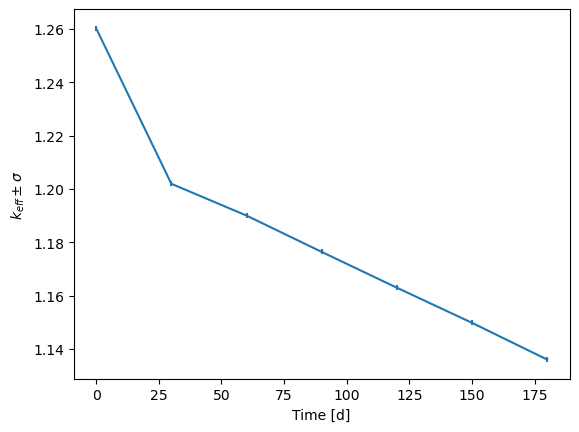

In [24]:
pyplot.errorbar(time, k[:, 0], yerr=k[:, 1])
pyplot.xlabel("Time [d]")
pyplot.ylabel("$k_{eff}\pm \sigma$");

In [25]:
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

RuntimeError: Plots XML file 'plots.xml' does not exist!